In [1]:
import pandas as pd
from pandas import DataFrame

#import data from csv

vaccination = pd.read_csv("data/covid-vaccination-policy.csv")
transport = pd.read_csv("data/public-transport-covid.csv")
stay_home = pd.read_csv("data/stay-at-home-covid.csv")

face_cover = pd.read_csv("data/face-covering-policies-covid.csv")
owid = pd.read_csv("data/owid-covid-data.csv")


#Series with g20 members according to wikipedia + spain
g20_members = pd.Series(["Argentina", "Australia", "Brazil", "Canada", "China", "France", "Germany", "India", "Indonesia", "Italy", "Japan", "South Korea", "Mexico", "Russia", "Saudi Arabia", "South Africa", "Turkey", "United Kingdom", "United States", "Spain", "European Union"])

#filter data array for locations that match g20 countries
g20_data = owid[owid["location"].isin(g20_members)].reset_index(drop=True)
g20_data = g20_data.loc[:, g20_data.columns.intersection(["location", "date", "new_cases"])]
#cleaned data
g20_data

,location,date,new_cases
0,Argentina,2020-01-01,NaN
1,Argentina,2020-01-02,NaN
2,Argentina,2020-01-03,NaN
3,Argentina,2020-01-04,NaN
4,Argentina,2020-01-05,NaN
...,...,...,...
10129,United States,2021-05-23,12853.0
10130,United States,2021-05-24,25925.0
10131,United States,2021-05-25,22756.0
10132,United States,2021-05-26,24052.0


### FaceCover

In [2]:
g20_face_cover = face_cover[face_cover["Entity"].isin(g20_members)].reset_index(drop=True)

In [3]:
phases = []

for country in g20_members:
    df = g20_face_cover[g20_face_cover["Entity"] == country].reset_index(drop=True)
    level = 0
    for index, row in df.iterrows():
        if row["facial_coverings"] != level:
            phases.append([country, row["Day"], row["facial_coverings"]])
            level = row["facial_coverings"]
                           
    
face_cover_phases = DataFrame(phases, columns=["country","date","level_changes"]).dropna(how="all").reset_index(drop=True)
face_cover_phases["date"] = pd.to_datetime(face_cover_phases["date"], yearfirst=True)
face_cover_phases

,country,date,level_changes
0,Argentina,2020-04-14,3
1,Australia,2020-07-13,1
2,Australia,2020-07-30,4
3,Australia,2020-11-22,2
4,Australia,2021-01-08,4
...,...,...,...
63,United States,2020-04-06,3
64,United States,2020-07-01,4
65,Spain,2020-05-04,2
66,Spain,2020-05-21,3


### Vaccine

In [ ]:
#TODO

### Travel Restriction

In [ ]:
#TODO

### Stay at home

In [ ]:
#TODO

## Plot

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

     country       date  level_changes  new_cases  month  year  day
0  Argentina 2020-04-14              3       69.0  April  2020   14


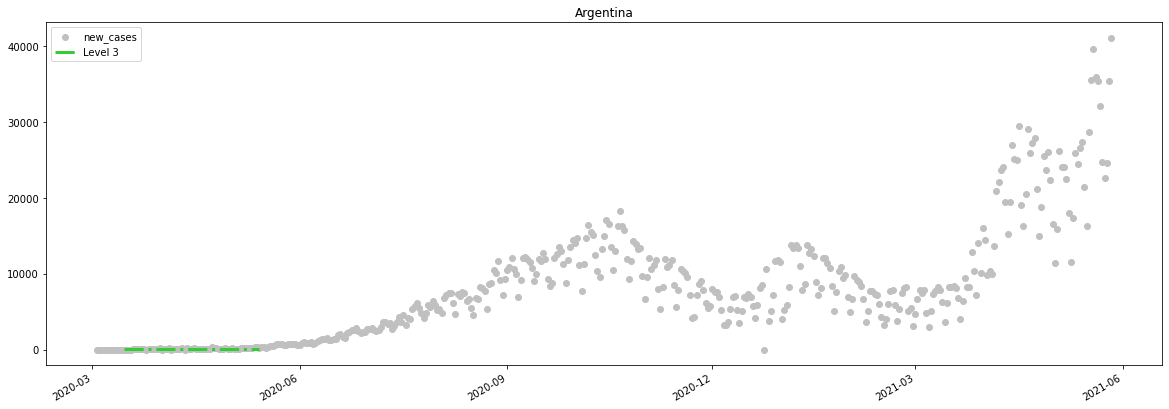

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

      country       date  level_changes  new_cases     month  year  day
0   Australia 2020-07-13              1      271.0      July  2020   13
1   Australia 2020-07-30              4      605.0      July  2020   30
2   Australia 2020-11-22              2       13.0  November  2020   22
3   Australia 2021-01-08              4       11.0   January  2021    8
4   Australia 2021-01-11              2       20.0   January  2021   11
5   Australia 2021-01-31              3        7.0   January  2021   31
6   Australia 2021-02-12              4        5.0  February  2021   12
7   Australia 2021-02-18              3        6.0  February  2021   18
8   Australia 2021-02-27              2        5.0  February  2021   27
9   Australia 2021-03-29              3       20.0     March  2021   29
10  Australia 2021-04-10              2        9.0     April  2021   10
11  Australia 2021-04-23              4       15.0     April  2021   23
12  Australia 2021-05-01              3       13.0       May  20

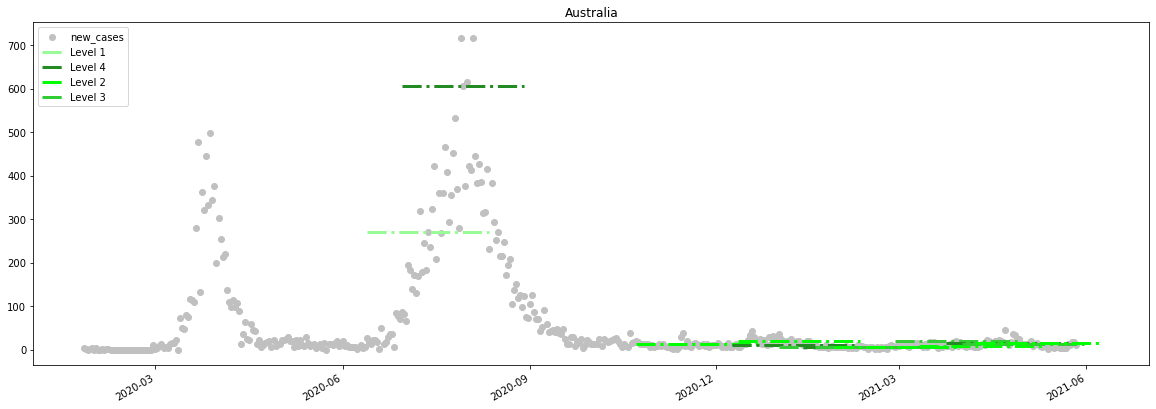

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

  country       date  level_changes  new_cases  month  year  day
0  Brazil 2020-03-02              1        0.0  March  2020    2
1  Brazil 2020-03-22              2      525.0  March  2020   22
2  Brazil 2020-04-11              4     1089.0  April  2020   11


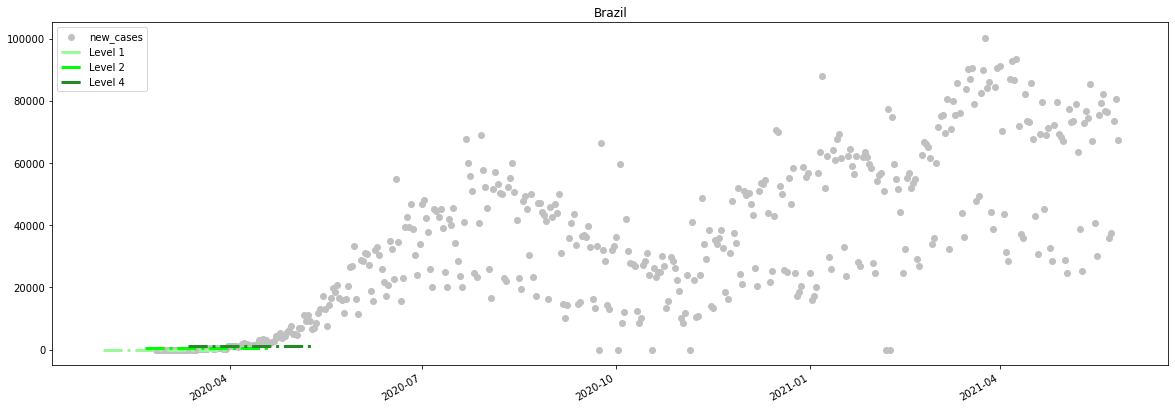

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

  country       date  level_changes  new_cases   month  year  day
0  Canada 2020-04-20              1     2025.0   April  2020   20
1  Canada 2020-06-26              2      166.0    June  2020   26
2  Canada 2020-08-01              3      242.0  August  2020    1


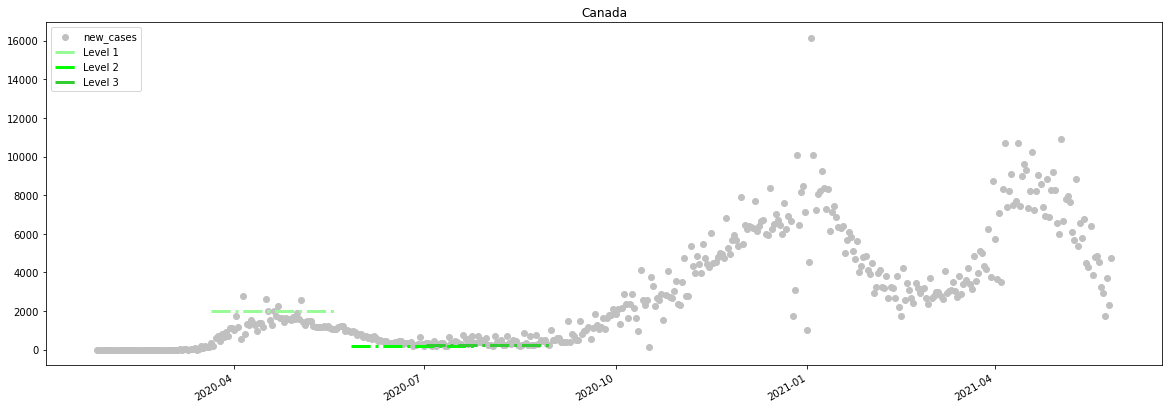

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

  country       date  level_changes  new_cases     month  year  day
0   China 2020-01-22              3        NaN   January  2020   22
1   China 2020-03-24              2       63.0     March  2020   24
2   China 2020-10-24              4       15.0   October  2020   24
3   China 2021-02-22              2       10.0  February  2021   22


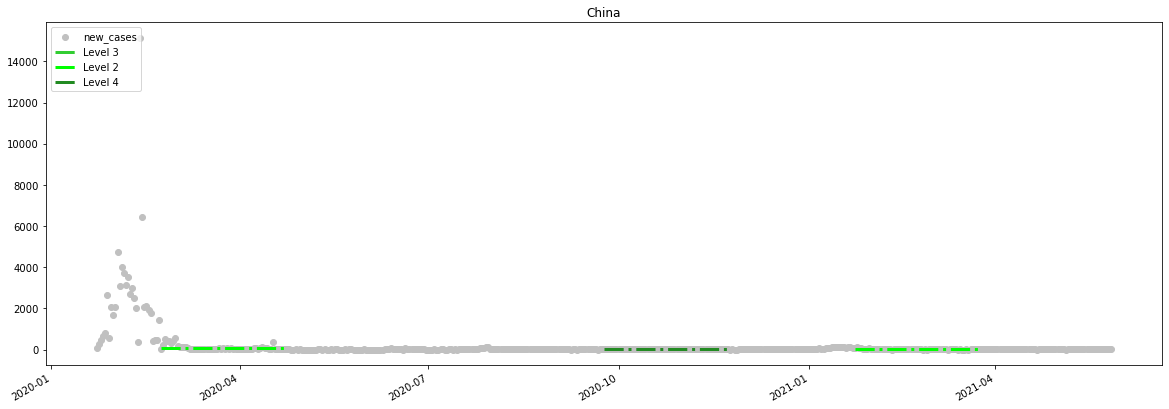

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

  country       date  level_changes  new_cases   month  year  day
0  France 2020-05-11              2      314.0     May  2020   11
1  France 2020-07-20              3     1911.0    July  2020   20
2  France 2020-08-03              4     3360.0  August  2020    3


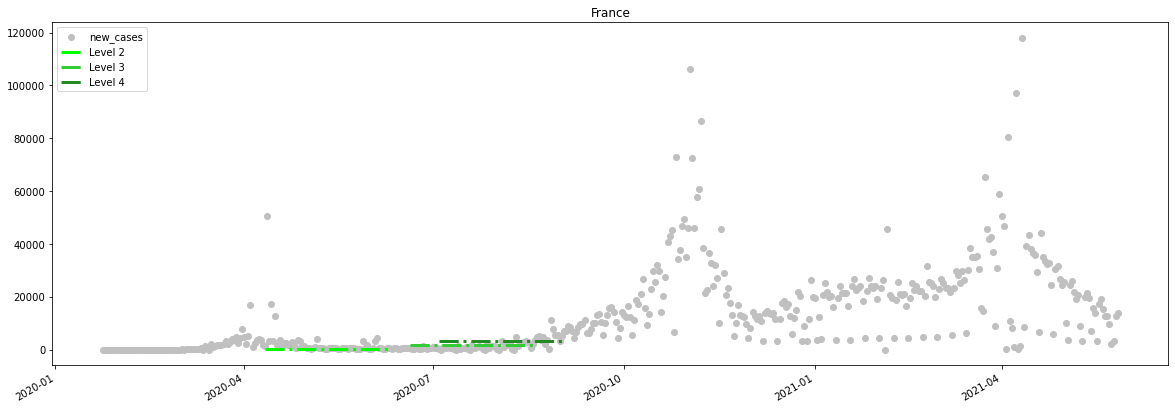

   country       date  level_changes  new_cases  month  year  day
0  Germany 2020-04-01              1     6064.0  April  2020    1
1  Germany 2020-04-06              2     3251.0  April  2020    6


C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

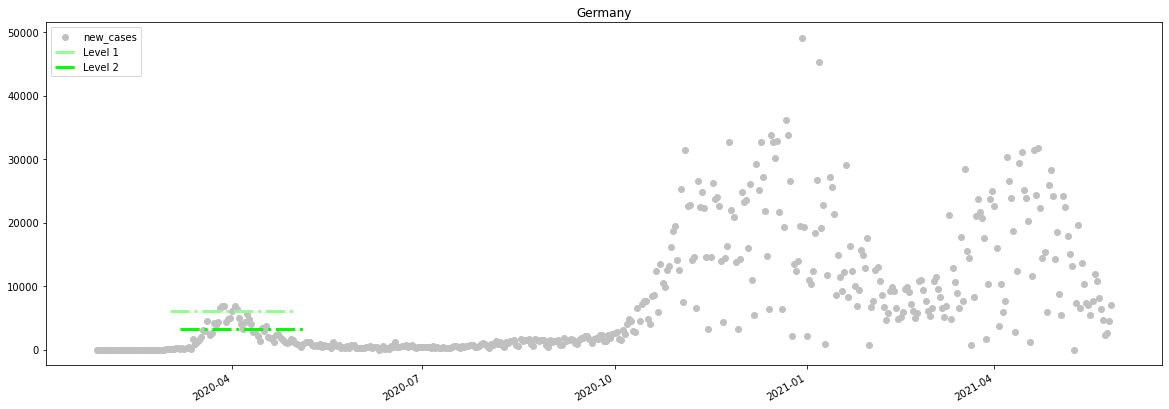

  country       date  level_changes  new_cases  month  year  day
0   India 2020-04-02              1      545.0  April  2020    2
1   India 2020-04-09              4      809.0  April  2020    9


C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

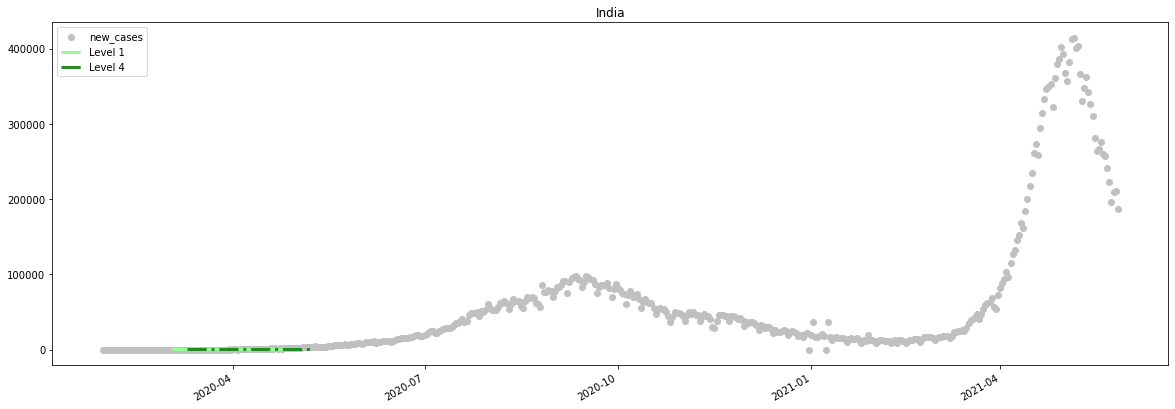

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

     country       date  level_changes  new_cases  month  year  day
0  Indonesia 2020-04-05              1      181.0  April  2020    5
1  Indonesia 2020-04-06              4      218.0  April  2020    6


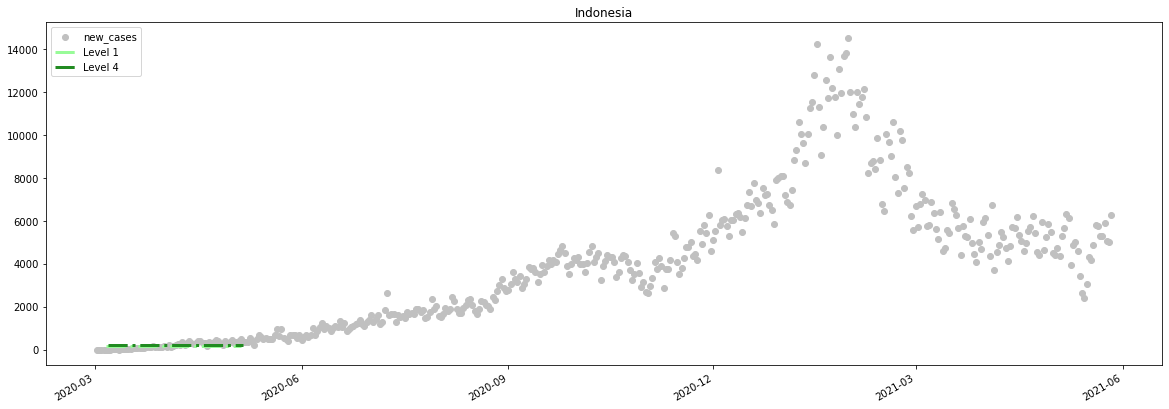

  country       date  level_changes  new_cases  month  year  day
0   Italy 2020-04-04              4     4805.0  April  2020    4


C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

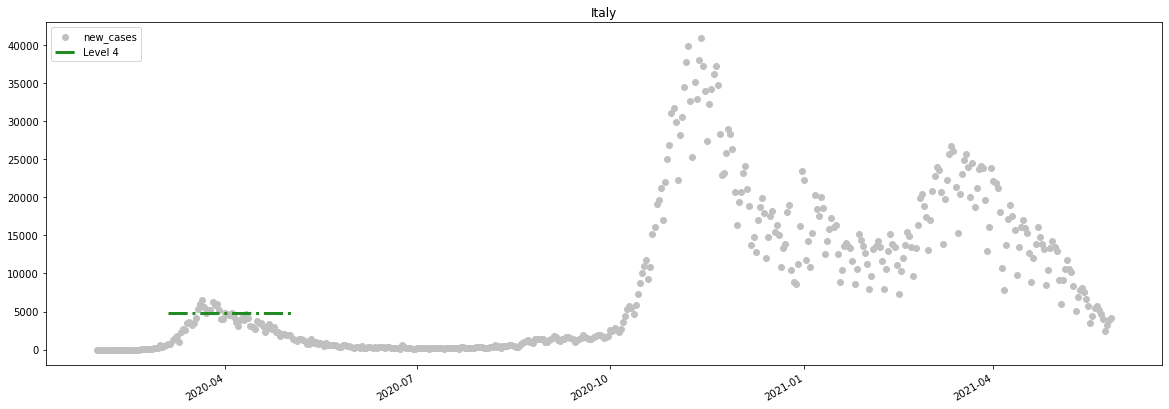

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

  country       date  level_changes  new_cases     month  year  day
0   Japan 2020-03-01              1       14.0     March  2020    1
1   Japan 2020-11-17              3     1690.0  November  2020   17
2   Japan 2020-11-24              1     1232.0  November  2020   24


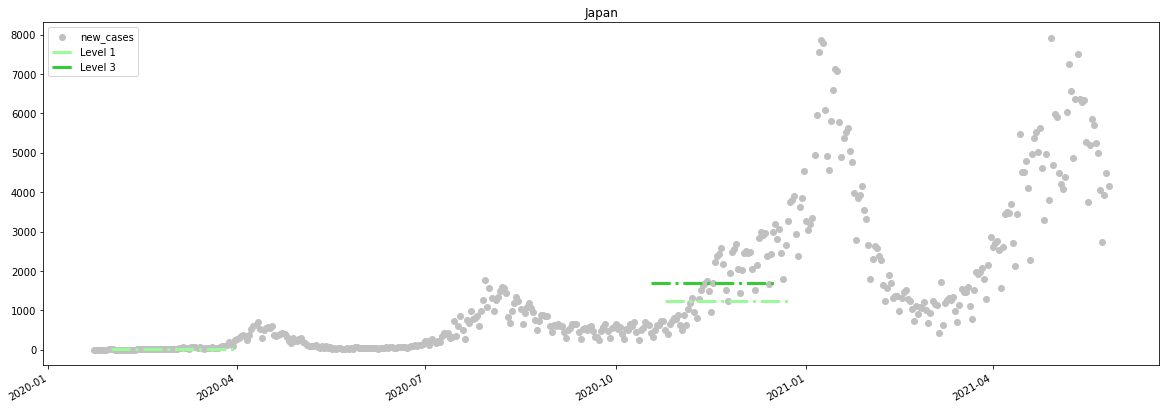

       country       date  level_changes  new_cases    month  year  day
0  South Korea 2020-03-15              1       76.0    March  2020   15
1  South Korea 2020-05-13              2       29.0      May  2020   13
2  South Korea 2020-10-13              3       84.0  October  2020   13


C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

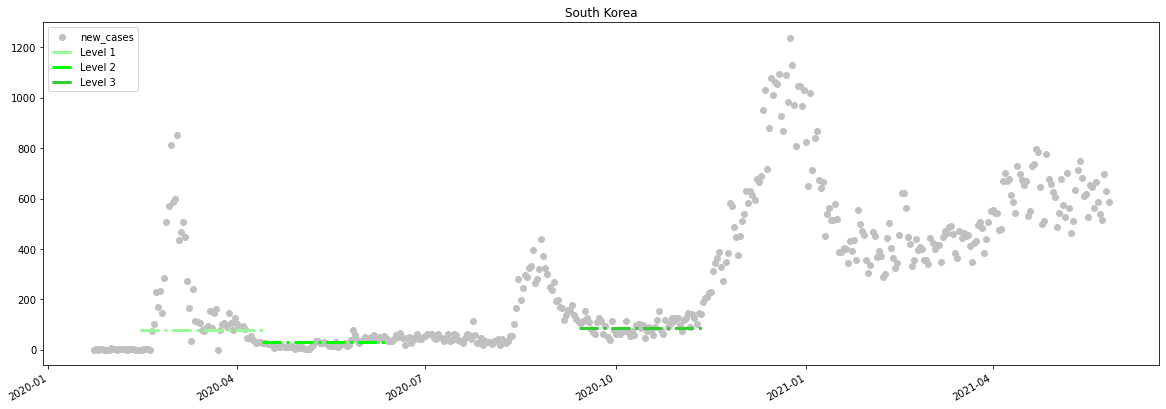

  country       date  level_changes  new_cases  month  year  day
0  Mexico 2020-04-17              4      578.0  April  2020   17


C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

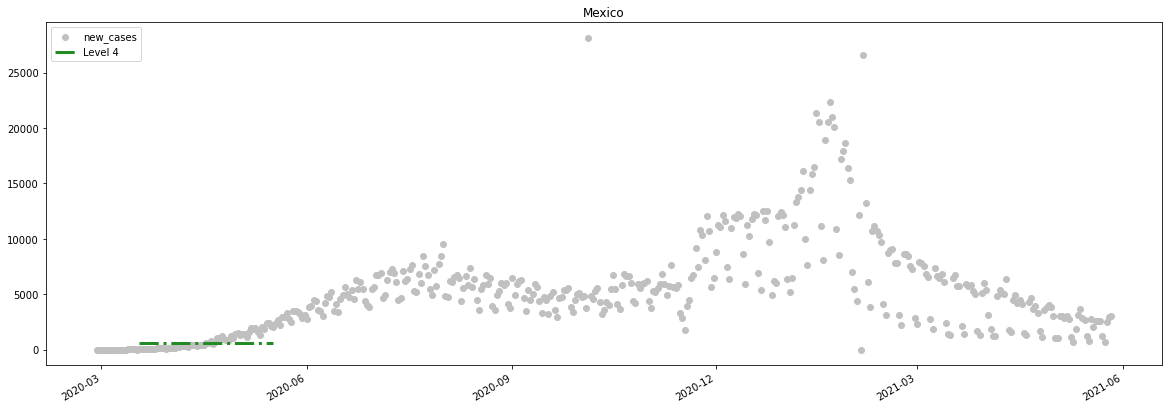

  country       date  level_changes  new_cases     month  year  day
0  Russia 2020-04-19              3     6060.0     April  2020   19
1  Russia 2020-07-13              2     6511.0      July  2020   13
2  Russia 2021-02-01              3    17391.0  February  2021    1
3  Russia 2021-02-10              2    14258.0  February  2021   10


C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

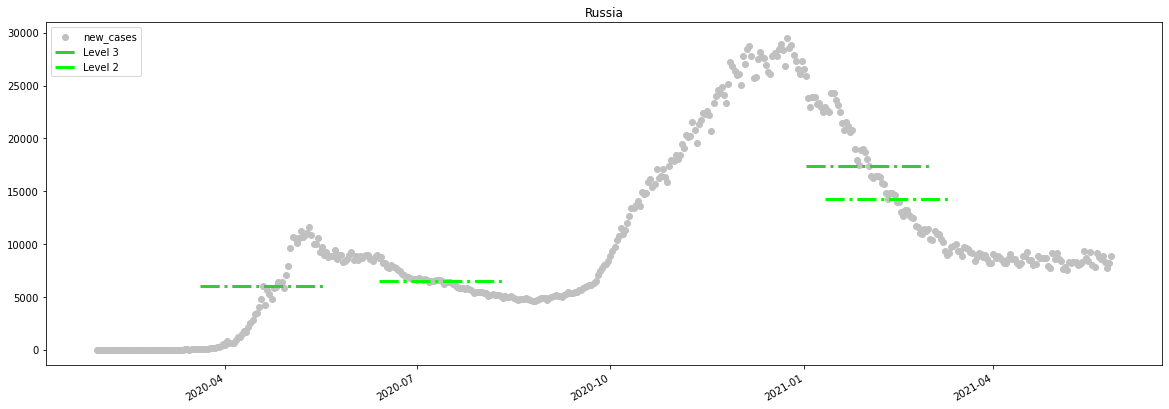

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

        country       date  level_changes  new_cases  month  year  day
0  Saudi Arabia 2020-04-28              1     1266.0  April  2020   28
1  Saudi Arabia 2020-05-30              3     1618.0    May  2020   30


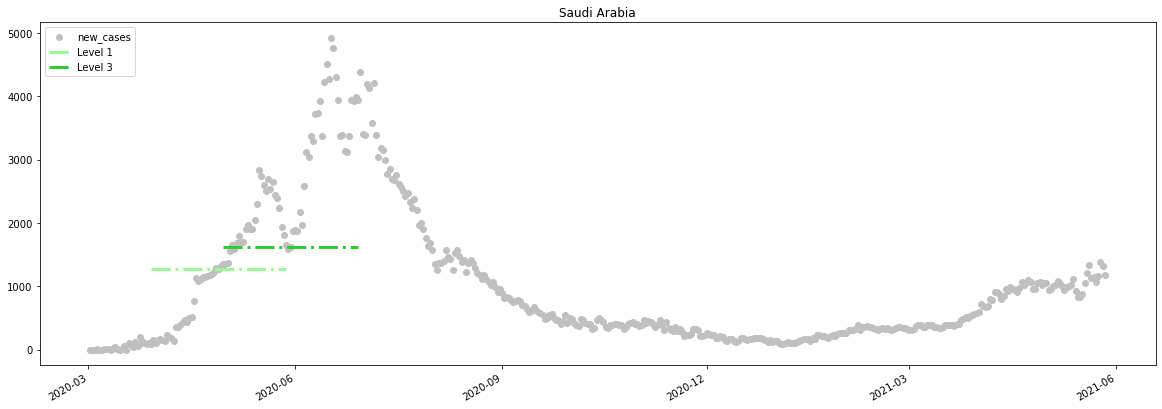

        country       date  level_changes  new_cases    month  year  day
0  South Africa 2020-04-01              1       27.0    April  2020    1
1  South Africa 2020-05-01              3      304.0      May  2020    1
2  South Africa 2021-01-12              4    13105.0  January  2021   12
3  South Africa 2021-01-19              3     9780.0  January  2021   19


C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

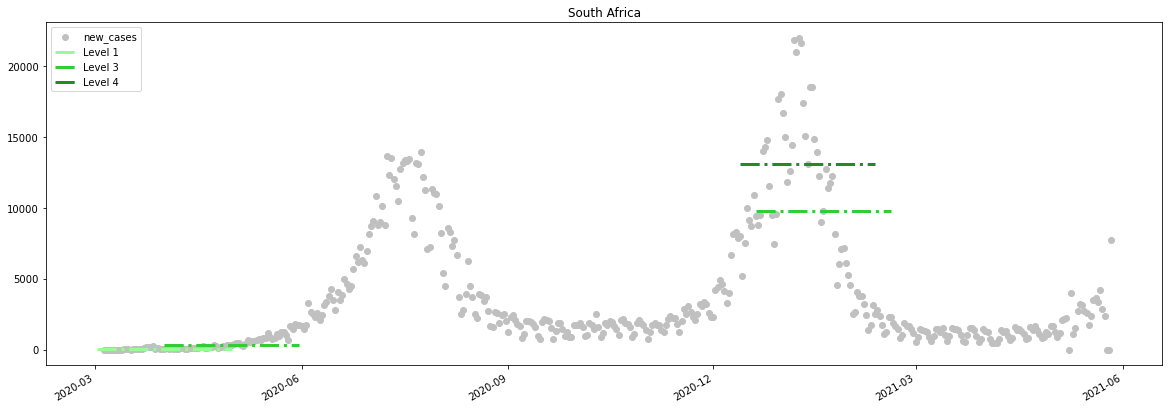

  country       date  level_changes  new_cases month  year  day
0  Turkey 2020-06-07              4      914.0  June  2020    7


C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

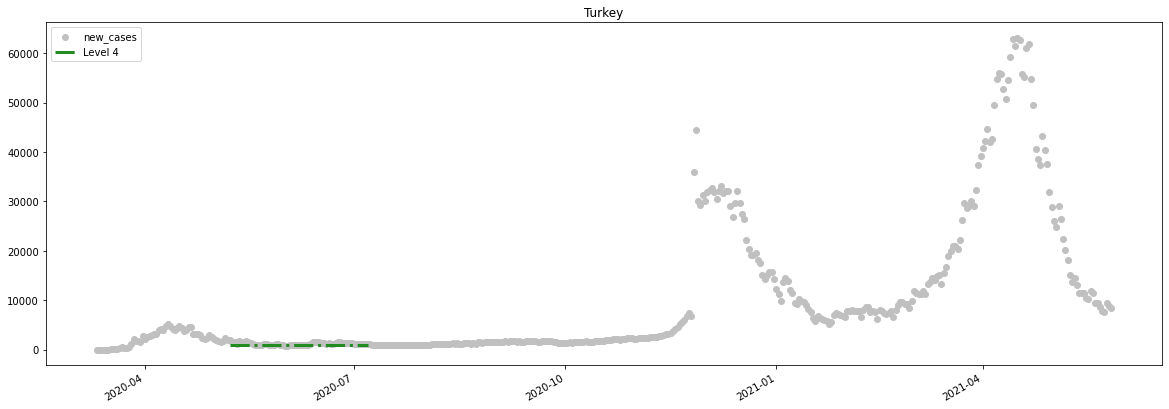

          country       date  level_changes  new_cases   month  year  day
0  United Kingdom 2020-04-28              1     4727.0   April  2020   28
1  United Kingdom 2020-06-22              2      892.0    June  2020   22
2  United Kingdom 2020-08-17              3      721.0  August  2020   17


C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

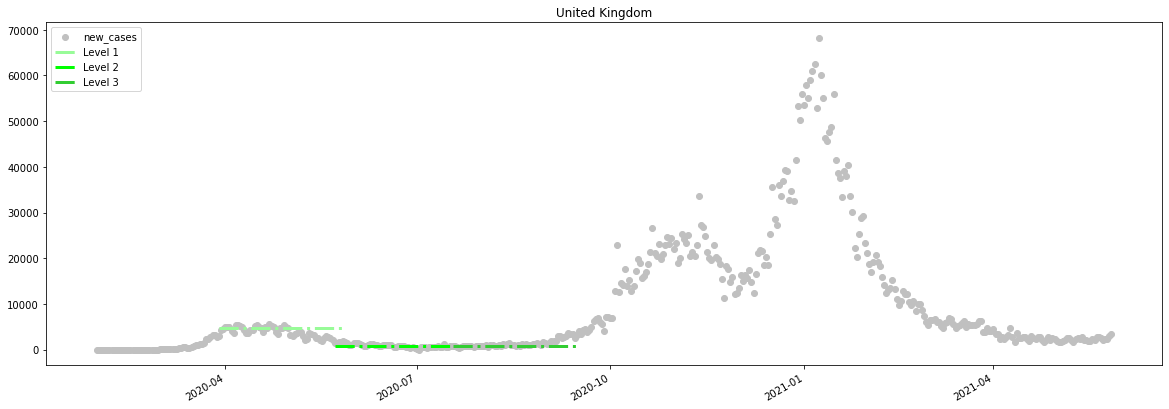

         country       date  level_changes  new_cases  month  year  day
0  United States 2020-03-10              1      188.0  March  2020   10
1  United States 2020-04-04              2    32390.0  April  2020    4
2  United States 2020-04-06              3    31393.0  April  2020    6
3  United States 2020-07-01              4    51819.0   July  2020    1


C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

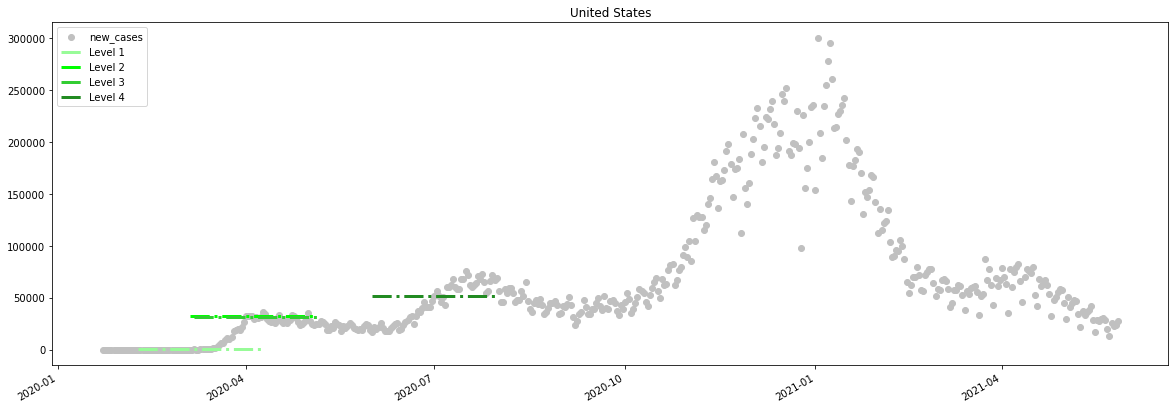

  country       date  level_changes  new_cases    month  year  day
0   Spain 2020-05-04              2      545.0      May  2020    4
1   Spain 2020-05-21              3      482.0      May  2020   21
2   Spain 2020-10-13              4     7118.0  October  2020   13


C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

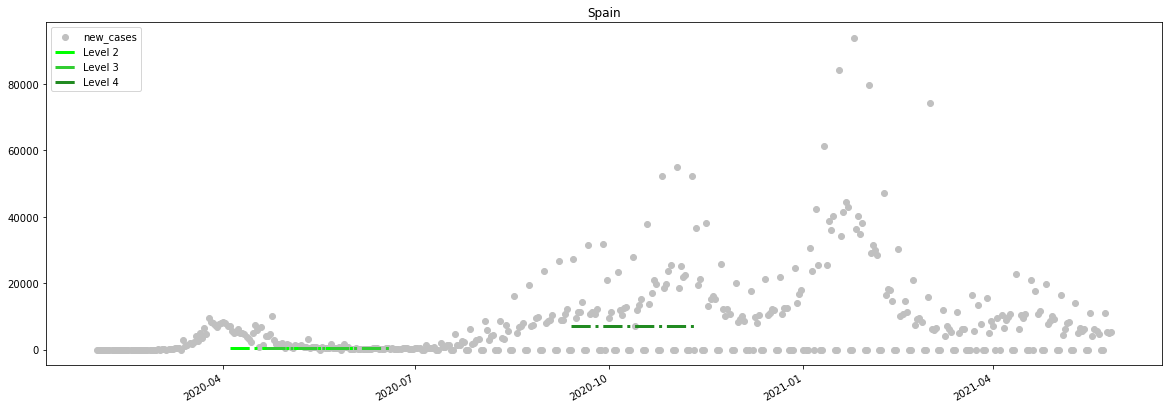

Empty DataFrame
Columns: [country, level_changes, date, new_cases, month, year, day]
Index: []


C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

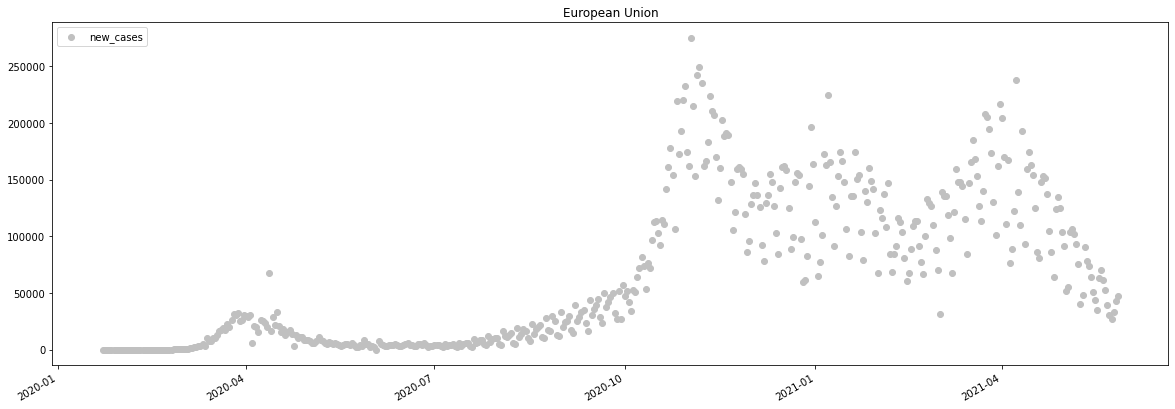

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import OrderedDict
from datetime import timedelta
#plot each countries in g20
for loc in g20_members:
    
    #TODO: same for other policies
    
    only_pain = g20_data[g20_data["location"]==loc]
    phase = face_cover_phases[face_cover_phases["country"]==loc]
    
    
    #make sure date is in datetime format
    only_pain["date"] = pd.to_datetime(only_pain["date"], yearfirst=True)
    only_pain["month"] = only_pain.date.dt.month_name()
    only_pain["year"] = only_pain.date.dt.year
    only_pain["day"] = only_pain.date.dt.day
    
    #TODO: remove negative numbers
    #negative to positive
    only_pain["new_cases"] = only_pain["new_cases"].map(lambda x: abs(x), na_action="ignore")
    
    
    #merge mask phases with num of cases
    final_mask = phase.merge(only_pain, on="date")
    final_mask = final_mask.drop(["location"],axis=1)
    #final_mask = [country  date  level_changes  new_cases  month  year  day]
    
    #TODO: merge other policies with num of cases
    
    
    #basic plot
    
    fig, ax = plt.subplots(figsize=(20,7))
    ax.scatter("date", "new_cases", data = only_pain, color="silver")
    fmt_every_month = mdates.MonthLocator(interval=3)
    ax.xaxis.set_major_locator(fmt_every_month)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    fig.autofmt_xdate()
    plt.title(loc)
    
    
    
    #plot h-lines for MASK
    mask_colors = ["palegreen", "lime", "limegreen", "forestgreen"]
    for ind, data in final_mask.iterrows():
        plt.hlines(data[3], xmin=data[1]-timedelta(30), xmax =data[1]+timedelta(30), colors = mask_colors[int(data[2])-1],
                   label = f"Level {int(data[2])}", linestyles="dashdot", linewidth=3)
    
    
    #TODO: plot h-lines for other policies
    
    
    
    
    
    
    
    
    #plot everything
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),loc="upper left")
    plt.show()
    

    